This program will identify objects in the fashion pictures.


In [1]:
#Import data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
df_train=pd.read_csv('fashion-mnist_train.csv')
df_test=pd.read_csv('fashion-mnist_test.csv')

In [44]:

df_test.head()
df_test.tail()
df_train.head()
df_train.tail()
df_train.shape
df_test.shape
df_train.describe()
df_train.info()
df_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


The data frame shows the first column (0) is the label from 0-9?  and column 1 to col 784 are the 28x28 pixels


In [58]:
training = np.array(df_train, dtype='float32')
testing = np.array(df_test, dtype='float32')
#training = np.array(df_train)
training[0:1,0]
type(training[0][0])
type(testing[0][0])

numpy.float32

6.0 51931


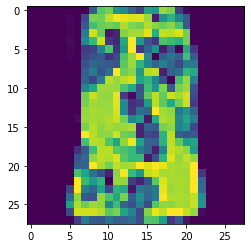

In [64]:
# display some sample data as picture
import random 
i = random.randint(1,60000)
plt.imshow(training[i,1:].reshape(28,28))
print(training[i,0], i)


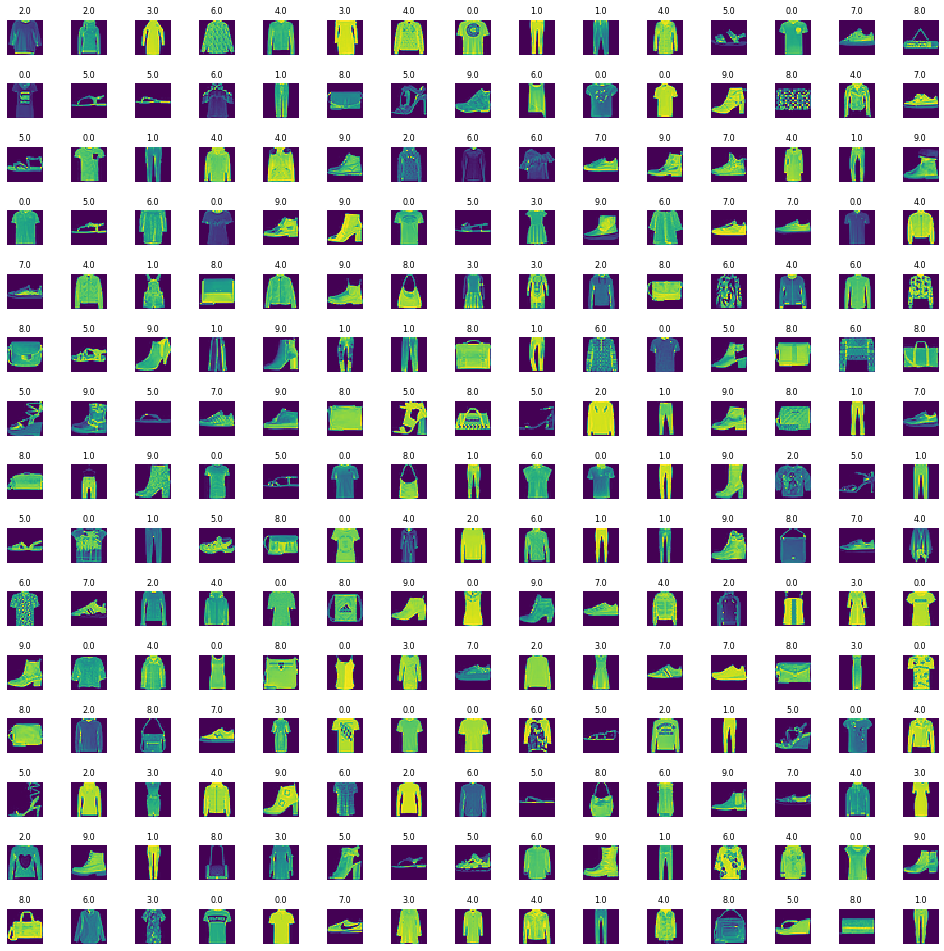

In [81]:
# create subplots
W_grid=15
L_grid=15

fig, axes= plt.subplots(L_grid, W_grid, figsize=(17,17))
axes = axes.ravel()         # Flatten the 15x15 matrix into 225 array
n_training=len(training)    # Get the number of traing record
for i in np.arange(0, W_grid * L_grid):
    index=np.random.randint(0,n_training)
    axes[i].imshow(training[index,1:].reshape(28,28))
    axes[i].set_title(training[index,0], fontsize=8)
    axes[i].axis('off')
    
plt.subplots_adjust(hspace=0.8)

In [75]:
type(axes)

numpy.ndarray

In [166]:
#Train The Model
X_train = training[:, 1:]/255    # normalize 
y_train = training[:, 0]
X_test = testing[:, 1:]/255    # normalize 
y_test = testing[:, 0]
X_train.shape

(60000, 784)

In [167]:
from sklearn.model_selection import train_test_split  
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size = 0.2, random_state = 12345)
print(len(X_train))
print(X_train.shape)
print(X_train.shape[0])

48000
(48000, 784)
48000


In [168]:
X_train_28= X_train.reshape(X_train.shape[0],*(28, 28, 1))
X_test_28 = X_test.reshape(X_test.shape[0],*(28, 28, 1))
X_validate_28= X_validate.reshape(X_validate.shape[0],*(28, 28, 1))

In [174]:
print(X_train_28.shape)
print(y_train.shape)
print(X_test_28.shape)
print(X_validate_28.shape)
print(y_validate.shape)


(48000, 28, 28, 1)
(48000,)
(10000, 28, 28, 1)
(12000, 28, 28, 1)
(12000,)


In [175]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard



In [178]:
# create a CNN model
cnn_model = Sequential()

# Add kernels. 32 Kernels with size 3x3. activiation function is relu.
cnn_model.add(Conv2D(32,(3,3),input_shape=(28,28,1), activation= 'relu'))   

# Add MaxPooling
cnn_model.add(MaxPooling2D(pool_size=(2,2))) 

# Add Flatten
cnn_model.add(Flatten())   

# Add Dense
cnn_model.add(Dense(output_dim=32, activation = 'relu') )

# Add Another Dense with sigma as activation function
cnn_model.add(Dense(output_dim=10, activation = 'sigmoid') )

/Users/jameskw@us.ibm.com/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=32)`
  
/Users/jameskw@us.ibm.com/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=10)`


In [179]:
cnn_model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 32)                173088    
_________________________________________________________________
dense_15 (Dense)             (None, 10)                330       
Total params: 173,738
Trainable params: 173,738
Non-trainable params: 0
_________________________________________________________________


In [180]:
cnn_model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001),metrics=['accuracy'])

In [181]:
epochs=50
cnn_model.fit(X_train_28, y_train, batch_size = 512, nb_epoch = epochs, verbose = 1,  
              validation_data=(X_validate_28, y_validate))

/Users/jameskw@us.ibm.com/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  This is separate from the ipykernel package so we can avoid doing imports until


Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 9s 192us/step - loss: 0.9084 - accuracy: 0.6810 - val_loss: 0.5048 - val_accuracy: 0.8195
Epoch 2/50
48000/48000 [==============================] - 9s 191us/step - loss: 0.4630 - accuracy: 0.8382 - val_loss: 0.4232 - val_accuracy: 0.8563
Epoch 3/50
48000/48000 [==============================] - 10s 217us/step - loss: 0.4103 - accuracy: 0.8570 - val_loss: 0.3878 - val_accuracy: 0.8663
Epoch 4/50
48000/48000 [==============================] - 12s 251us/step - loss: 0.3770 - accuracy: 0.8707 - val_loss: 0.3760 - val_accuracy: 0.8692
Epoch 5/50
48000/48000 [==============================] - 10s 201us/step - loss: 0.3574 - accuracy: 0.8760 - val_loss: 0.3455 - val_accuracy: 0.8827
Epoch 6/50
48000/48000 [==============================] - 9s 182us/step - loss: 0.3369 - accuracy: 0.8827 - val_loss: 0.3328 - val_accuracy: 0.8835
Epoch 7/50
48000/48000 [==============================] - 9